<a href="https://colab.research.google.com/github/kr-pushpam/Data-Mining-Assignment/blob/main/Data_Mining_Assignment_01_Solution_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Question 3: Build logistic regression and KNNclassifiers to predict the type of wine in the dataset available at** https://archive.ics.uci.edu/dataset/109/wine.

# **Compare their predictive capabilities to select the best predictive model**



---



Build the follwing model to predict the type of wine
  1. Logistic Regression and
  2. KNNclassifiers to predict the type of wine.
  
The Dataset - https://archive.ics.uci.edu/dataset/109/wine.

Compare their predictive capabilities to select the best predictive model.

In [36]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


About the dataset:


About Data : https://archive.ics.uci.edu/ml/datasets/Wine


Data  =      https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"



In [37]:
import pandas as pd

# Define the URL to the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Define the column names as the dataset does not include a header
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]

# Load the dataset directly from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(df.head())


   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [38]:
#Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
df = pd.read_csv(url, header=None, names=column_names)

In [39]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [40]:
df.shape

(178, 14)

In [41]:
# Preprocess the data - features and label
X = df.drop('Class', axis=1)
y = df['Class']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.75, random_state=33)

In [42]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [44]:
# Step 1: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
    'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
    'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
data = pd.read_csv(url, header=None, names=column_names)

In [45]:
# Step 1: Build and evaluate Logistic Regression Model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
log_reg_class_report = classification_report(y_test, y_pred_log_reg, output_dict=True)

print("Logistic Regression Metrics:")
print("Accuracy:", log_reg_accuracy)
print("Confusion Matrix:\n", log_reg_conf_matrix)
print("Classification Report:\n", log_reg_class_report)

Logistic Regression Metrics:
Accuracy: 0.9776119402985075
Confusion Matrix:
 [[43  0  0]
 [ 2 53  0]
 [ 0  1 35]]
Classification Report:
 {'1': {'precision': 0.9555555555555556, 'recall': 1.0, 'f1-score': 0.9772727272727273, 'support': 43.0}, '2': {'precision': 0.9814814814814815, 'recall': 0.9636363636363636, 'f1-score': 0.9724770642201835, 'support': 55.0}, '3': {'precision': 1.0, 'recall': 0.9722222222222222, 'f1-score': 0.9859154929577465, 'support': 36.0}, 'accuracy': 0.9776119402985075, 'macro avg': {'precision': 0.9790123456790124, 'recall': 0.9786195286195286, 'f1-score': 0.9785550948168859, 'support': 134.0}, 'weighted avg': {'precision': 0.9781370923161968, 'recall': 0.9776119402985075, 'f1-score': 0.9776262951590765, 'support': 134.0}}


In [46]:
# Step 2: Build and evaluate KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation for KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_class_report = classification_report(y_test, y_pred_knn, output_dict=True)

print("KNN Metrics:")
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", knn_conf_matrix)
print("Classification Report:\n", knn_class_report)

KNN Metrics:
Accuracy: 0.9552238805970149
Confusion Matrix:
 [[43  0  0]
 [ 5 49  1]
 [ 0  0 36]]
Classification Report:
 {'1': {'precision': 0.8958333333333334, 'recall': 1.0, 'f1-score': 0.945054945054945, 'support': 43.0}, '2': {'precision': 1.0, 'recall': 0.8909090909090909, 'f1-score': 0.9423076923076923, 'support': 55.0}, '3': {'precision': 0.972972972972973, 'recall': 1.0, 'f1-score': 0.9863013698630136, 'support': 36.0}, 'accuracy': 0.9552238805970149, 'macro avg': {'precision': 0.9562687687687689, 'recall': 0.9636363636363635, 'f1-score': 0.9578880024085503, 'support': 134.0}, 'weighted avg': {'precision': 0.959312390748958, 'recall': 0.9552238805970149, 'f1-score': 0.9550084703683149, 'support': 134.0}}


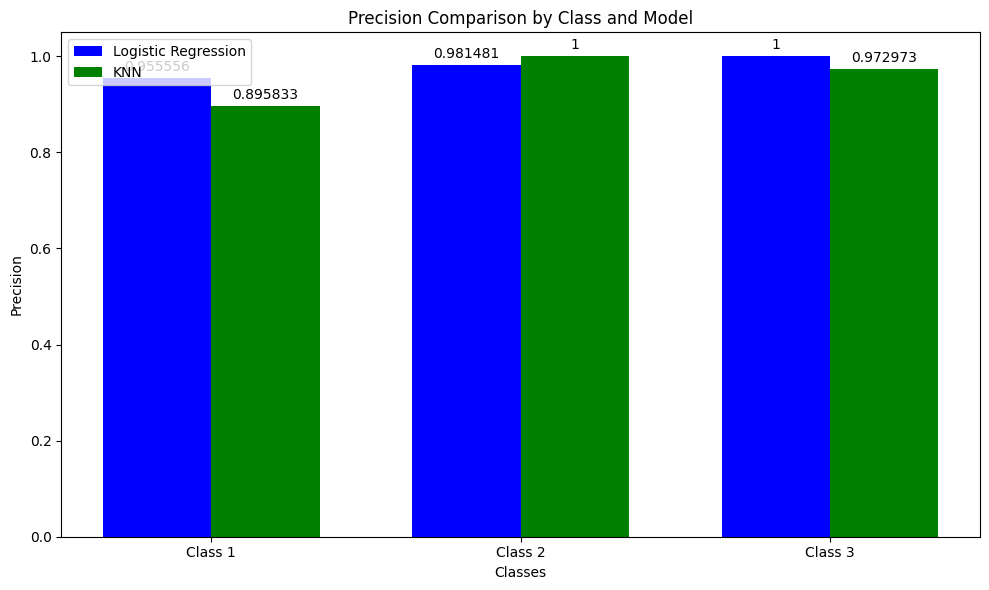

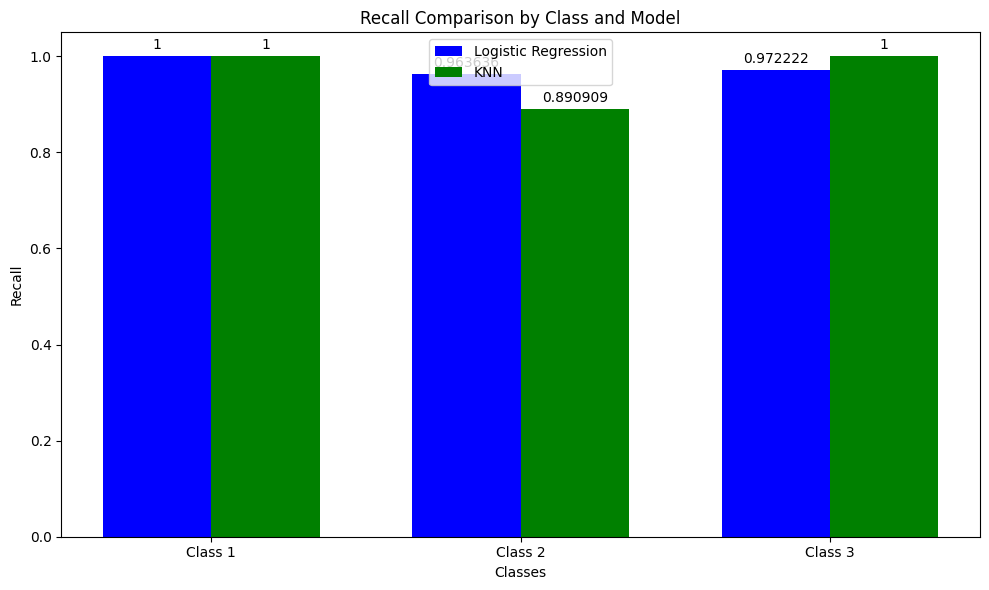

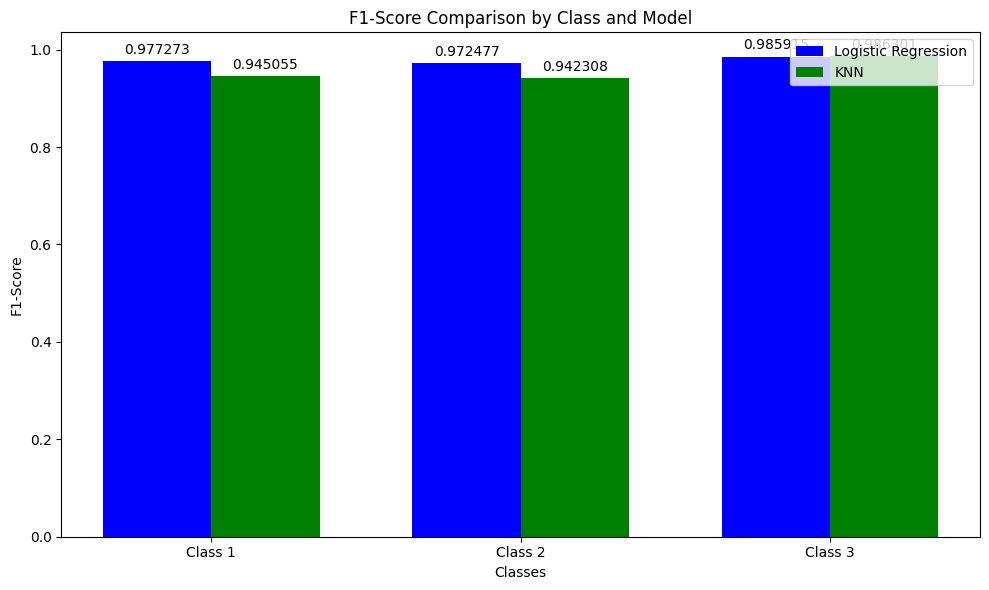

In [47]:
# Step 3: Comparative Study Section

classes = ['Class 1', 'Class 2', 'Class 3']

def plot_metrics_comparative(metric_name, log_reg_values, knn_values):
    """
    Function to plot comparative metrics for Logistic Regression and KNN models.
    """
    x = np.arange(len(classes))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    bars1 = ax.bar(x - width/2, log_reg_values, width, label='Logistic Regression', color='blue')
    bars2 = ax.bar(x + width/2, knn_values, width, label='KNN', color='green')

    ax.set_xlabel('Classes')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison by Class and Model')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()

    ax.bar_label(bars1, padding=3)
    ax.bar_label(bars2, padding=3)

    plt.tight_layout()
    plt.show()

# Extract precision, recall, and f1-score for both models
log_reg_precision = [log_reg_class_report[str(i)]['precision'] for i in range(1, 4)]
log_reg_recall = [log_reg_class_report[str(i)]['recall'] for i in range(1, 4)]
log_reg_f1 = [log_reg_class_report[str(i)]['f1-score'] for i in range(1, 4)]

knn_precision = [knn_class_report[str(i)]['precision'] for i in range(1, 4)]
knn_recall = [knn_class_report[str(i)]['recall'] for i in range(1, 4)]
knn_f1 = [knn_class_report[str(i)]['f1-score'] for i in range(1, 4)]

# Plotting Precision, Recall, and F1-Score Comparatively
plot_metrics_comparative('Precision', log_reg_precision, knn_precision)
plot_metrics_comparative('Recall', log_reg_recall, knn_recall)
plot_metrics_comparative('F1-Score', log_reg_f1, knn_f1)


<ipython-input-48-a205c53006eb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


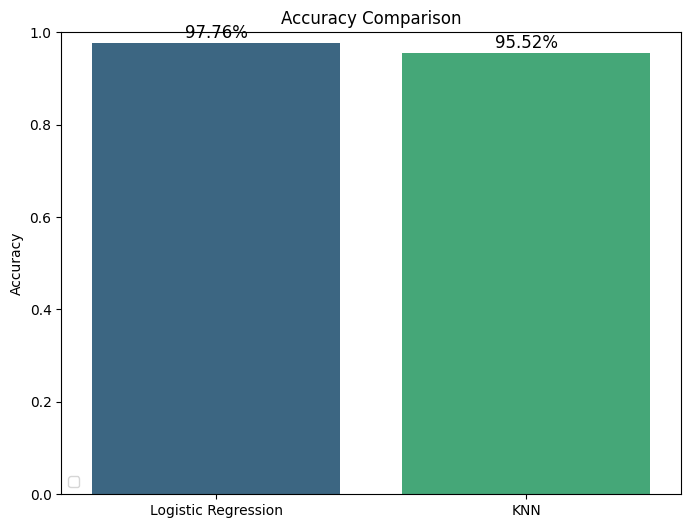

In [48]:
# Plotting Accuracy Comparison
def plot_accuracy_comparative(log_reg_acc, knn_acc):
    """
    Function to plot accuracy comparison for Logistic Regression and KNN models.
    """
    models = ['Logistic Regression', 'KNN']
    accuracies = [log_reg_acc, knn_acc]

    plt.figure(figsize=(8, 6))
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title('Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend(loc = 'lower left')
    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.01, f'{acc:.2%}', ha='center', fontsize=12)
    plt.show()

plot_accuracy_comparative(log_reg_accuracy, knn_accuracy)


In [49]:
# Evaluation for Logistic Regression
print("\nAccurancy :: \nLR:",log_reg_accuracy,"\nKNN",knn_accuracy)
print("\nConfusion Matrix :: \nLR:",log_reg_conf_matrix,"\nKNN",knn_conf_matrix)
print("\nClass Report :: \nLR:",log_reg_class_report,"\nKNN",knn_class_report)




Accurancy :: 
LR: 0.9776119402985075 
KNN 0.9552238805970149

Confusion Matrix :: 
LR: [[43  0  0]
 [ 2 53  0]
 [ 0  1 35]] 
KNN [[43  0  0]
 [ 5 49  1]
 [ 0  0 36]]

Class Report :: 
LR: {'1': {'precision': 0.9555555555555556, 'recall': 1.0, 'f1-score': 0.9772727272727273, 'support': 43.0}, '2': {'precision': 0.9814814814814815, 'recall': 0.9636363636363636, 'f1-score': 0.9724770642201835, 'support': 55.0}, '3': {'precision': 1.0, 'recall': 0.9722222222222222, 'f1-score': 0.9859154929577465, 'support': 36.0}, 'accuracy': 0.9776119402985075, 'macro avg': {'precision': 0.9790123456790124, 'recall': 0.9786195286195286, 'f1-score': 0.9785550948168859, 'support': 134.0}, 'weighted avg': {'precision': 0.9781370923161968, 'recall': 0.9776119402985075, 'f1-score': 0.9776262951590765, 'support': 134.0}} 
KNN {'1': {'precision': 0.8958333333333334, 'recall': 1.0, 'f1-score': 0.945054945054945, 'support': 43.0}, '2': {'precision': 1.0, 'recall': 0.8909090909090909, 'f1-score': 0.942307692307692